#### Part 1: Prepare the Data

1.  Read  `myopia.csv`  into a Pandas DataFrame.
2.  Remove the "MYOPIC" column from the dataset.
3.  Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [31]:
# Initial Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [44]:
# Read CSV file
myopia_df = pd.read_csv("Resources\myopia.csv")
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [45]:
# Remove MYOPIC columns
myopia_df = myopia_df.drop(['MYOPIC'], axis=1, inplace=True)
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [69]:
# Find null values
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [71]:
# Find duplicate entries
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [50]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df[['AGE','SPHEQ','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']])

In [51]:
# Create Dataframe with the transformed data
new_myopia_df = pd.DataFrame(scaled_data, columns=myopia_df.columns)

# Save the cleaned DataFrame as a new CSV file for further use
file_path = Path("Resources/new_myopia.csv")
new_myopia_df.to_csv(file_path, index=False)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


#### Part 2: Apply Dimensionality Reduction

1.  Perform dimensionality reduction with PCA. How did the number of the features change?
    
    **HINT**
    Rather than specify the number of principal components when you instantiate the PCA model, state the desired  **explained variance**. For example, say that a dataset has 100 features. Using  `PCA(n_components=0.99)`  creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3.
    
    For this assignment, preserve 90% of the explained variance in dimensionality reduction.
    
2.  Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
    
3.  Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [73]:
# Initialize PCA model
pca = PCA(n_components=.9)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(scaled_data)

Features decreased from 14 to 10 after applying dimensionality reduction

In [54]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

c:\Users\freew\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


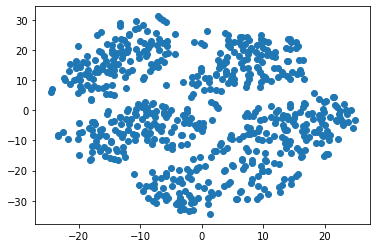

In [56]:
myopia_pca_df = pd.DataFrame()

myopia_pca_df['x'] = tsne_features[:,0]
myopia_pca_df['y'] = tsne_features[:,1]

import matplotlib.pyplot as plt

plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show()

*Are there distinct clusters?*

There appears to be an even distribution of clusters.

#### Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

-   Use a  `for`  loop to determine the inertia for each  `k`  between 1 through 10.
-   If possible, determine where the elbow of the plot is, and at which value of  `k`  it appears.

In [57]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\freew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,250011.968750
1,2,132957.656250
2,3,89784.882812
3,4,62060.136719
4,5,38476.203125


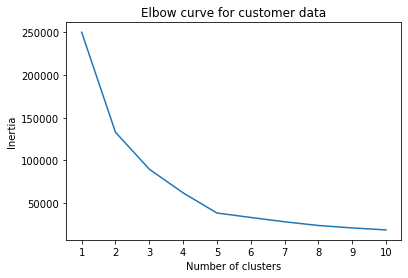

In [58]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [65]:
# Function: get_clusters
# Functions that finds the `k` clusters using K-Means on `data`. 
# The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

# Function: show_clusters
# Function that shows scatter plot
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

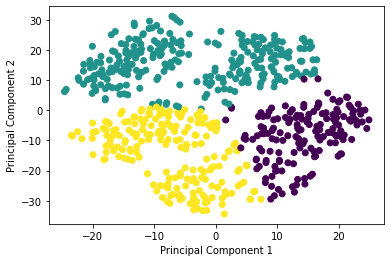

In [66]:
clusters = get_clusters(3, myopia_pca_df)
show_clusters(clusters)

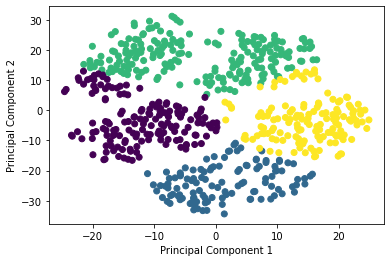

In [67]:
clusters = get_clusters(4, myopia_pca_df)
show_clusters(clusters)

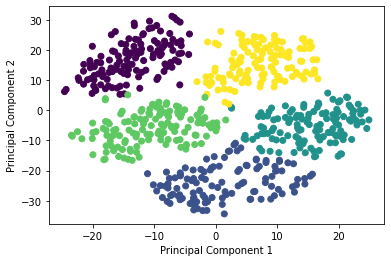

In [68]:
clusters = get_clusters(5, myopia_pca_df)
show_clusters(clusters)

#### Part 4: Make a Recommendation

*Can the patients be clustered? If so, into how many clusters?*

The elbow curve helps determine best number of clusters to use.  For this given dataset, it's best to use 3 clusters.  

Given the resulting cluster analysis, I would recommend using 3 groups of patients.